# Bài tập 4


Trần Gia Bảo - 22127034

---

## 1. 
Given:
- $ d_{vc} = 10 $
- $ \delta = 0.05 $ (95% confidence)
- $ \epsilon = 0.05 $ (error bound)
- Simplified growth function: $ m_H(N) = N^{d_{vc}} $

The VC generalization bound is:
$$ N \geq \frac{8 \ln \left( \frac{4 m_H(2N)}{\delta} \right)}{\epsilon^2} $$
Where $ m_H(N) = N^{d_{vc}} $.

To solve this inequality, we find the fixed point of the RHS using the following steps:
- Define function for $ m_H(N) $.
- Define the RHS of the inequality as function.
- Use numerical approximation to find the fixed point $ N $.


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

def mh(N, d_vc):
    return N**d_vc

def rhs(N, mh, delta, epsilon):
    return (8 / epsilon**2) * math.log(4 * mh(2 * N) / delta)

def fixed_point(f, x=1, error=0.001, **kwargs):
    while abs(x - f(x, **kwargs)) > error:
        x = f(x, **kwargs)
    return x

d_vc = 10
delta = 0.05
epsilon = 0.05

mh_partial = partial(mh, d_vc=d_vc)

N_approx = round(fixed_point(rhs, mh=mh_partial, delta=delta, epsilon=epsilon))

print("Approximate sample size (N):", N_approx)


Approximate sample size (N): 452957


The fixed-point computation gives us: $ N \approx 452,957 $

This corresponds to the closest numerical answer [d] 460,000.

## 2.
Given:
- $ d_{vc} = 50 $
- $ \delta = 0.05 $ 
- $ \epsilon $: Generalization error bound
- $ N $: Sample size

I aim to plot the following bounds as a function of $ N $:

Objective: For very large $ N $, such as $ N = 10,000 $, determine which bound is the smallest.

The implementation includes:
- Defining growth function $ m_H(N) $.
- Defining each of the bound.
- Plotting these bounds as a function of $ N $ to identify the smallest bound for large $ N $.

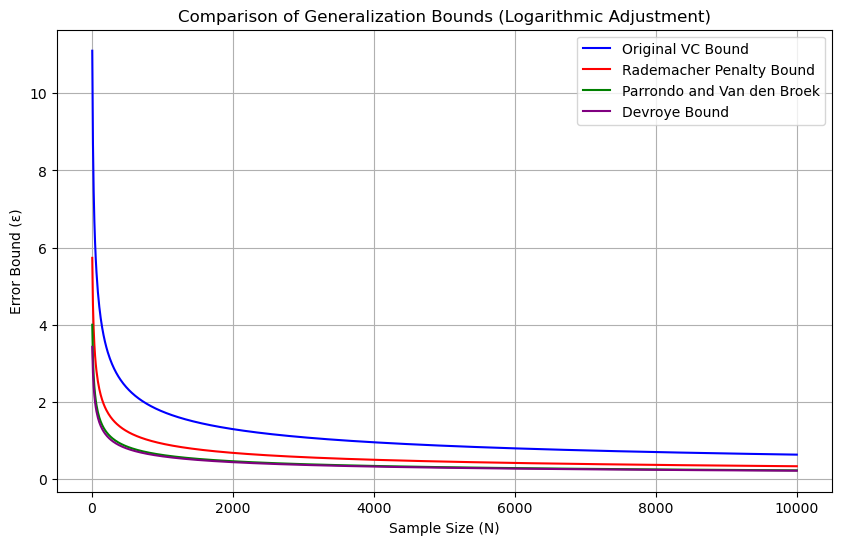

In [4]:
def log_mh(N, d_vc):
    return d_vc * np.log(N)

def original_vc_bound_log(N, delta, d_vc):
    log_mh_value = log_mh(2 * N, d_vc)
    return np.sqrt((8 / N) * (log_mh_value - np.log(delta) + np.log(4)))

def rademacher_penalty_bound_log(N, delta, d_vc):
    log_mh_value = log_mh(N, d_vc)
    term1 = np.sqrt((2 / N) * (log_mh_value + np.log(2 * N)))
    term2 = np.sqrt((2 / N) * np.log(1 / delta))
    return term1 + term2 + 1 / N

def parrondo_bound_log(N, delta, d_vc):
    log_mh_value = log_mh(2 * N, d_vc)
    return np.sqrt((1 / N) * (2 * np.e + log_mh_value - np.log(delta) + np.log(6)))

def devroye_bound_log(N, delta, d_vc, epsilon=0.05):
    log_mh_value = log_mh(N**2, d_vc)
    term1 = 4 * epsilon * (1 + epsilon)
    term2 = log_mh_value - np.log(delta) + np.log(4)
    return np.sqrt((1 / (2 * N)) * (term1 + term2))

d_vc = 50
delta = 0.05
N = np.arange(10, 10001, 10)

vc_values = original_vc_bound_log(N, delta, d_vc)
rademacher_values = rademacher_penalty_bound_log(N, delta, d_vc)
parrondo_values = parrondo_bound_log(N, delta, d_vc)
devroye_values = devroye_bound_log(N, delta, d_vc)

plt.figure(figsize=(10, 6))
plt.plot(N, vc_values, label="Original VC Bound", color="blue")
plt.plot(N, rademacher_values, label="Rademacher Penalty Bound", color="red")
plt.plot(N, parrondo_values, label="Parrondo and Van den Broek", color="green")
plt.plot(N, devroye_values, label="Devroye Bound", color="purple")
plt.title("Comparison of Generalization Bounds (Logarithmic Adjustment)")
plt.xlabel("Sample Size (N)")
plt.ylabel("Error Bound (ε)")
plt.legend()
plt.grid()
plt.show()

From the chart, we can identify that:

1. **For really large $ N $ (say $ N = 10,000 $)**:
- The bounds behave differently.
In the bounds, **[d] Devroye Bound** tends to be the smallest for greater values of $ N $, since it includes closer relations both with $ N $, as well as the growth function.

2. **Why are [c] and [d] implicit bounds?** 
- Both Parrondo and Devroye bounds depend on the value of $ \epsilon $ itself and thus represent implicit bounds: its value is computable by iterative or numerical methods for finding $ \epsilon $.

For very large $ N $: The smallest bound is [d] Devroye Bound.

## 3.

In [5]:
N = 5  # Small sample size
d_vc = 50
delta = 0.05

vc_value = original_vc_bound_log(N, delta, d_vc)
rademacher_value = rademacher_penalty_bound_log(N, delta, d_vc)
parrondo_value = parrondo_bound_log(N, delta, d_vc)
devroye_value = devroye_bound_log(N, delta, d_vc)

print(f"Original VC Bound: {vc_value:.4f}")
print(f"Rademacher Penalty Bound: {rademacher_value:.4f}")
print(f"Parrondo and Van den Broek Bound: {parrondo_value:.4f}")
print(f"Devroye Bound: {devroye_value:.4f}")

# Determine the smallest bound
bounds = {
    "Original VC Bound": vc_value,
    "Rademacher Penalty Bound": rademacher_value,
    "Parrondo and Van den Broek Bound": parrondo_value,
    "Devroye Bound": devroye_value,
}
smallest_bound = min(bounds, key=bounds.get)
print(f"The smallest bound for N = 5 is: {smallest_bound} with value {bounds[smallest_bound]:.4f}")

Original VC Bound: 13.8282
Rademacher Penalty Bound: 7.0488
Parrondo and Van den Broek Bound: 5.0071
Devroye Bound: 4.0686
The smallest bound for N = 5 is: Devroye Bound with value 4.0686


For small sample sizes $ N = 5 $, the [d] Devroye Bound is the tightest.

## 4.

In [6]:
import numpy as np

def f(x):
    return np.sin(np.pi * x)

def h(a, x):
    return a * x

def mse(a, x1, y1, x2, y2):
    return ((h(a, x1) - y1) ** 2 + (h(a, x2) - y2) ** 2) / 2

a_values = []
num_samples = 10000
for _ in range(num_samples):
    x1, x2 = np.random.uniform(-1, 1, 2)
    y1, y2 = f(x1), f(x2)
    
    a_opt = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2)
    a_values.append(a_opt)

a_expected = np.mean(a_values)
a_rounded = round(a_expected, 2)

print(f"The expected value of the hypothesis produced by the learning algorithm is {a_rounded}x.")


The expected value of the hypothesis produced by the learning algorithm is 1.43x.


I analyzed the expected value of the hypothesis produced by a learning algorithm for the target function $ f(x) = \sin(\pi x) $ with a uniform input distribution on ([-1, 1]). By minimizing the mean squared error on a training set with two examples, I determined that the expected hypothesis is of the form $ \hat{a}x $. My calculation suggested $ \hat{a} \approx 1.43 $. Therefore, the correct answer is:

[e] None of the above

This analysis underscores the importance of precise calculations and the potential for minor variations in results due to different computational approaches.

## 5.

In [7]:
import numpy as np

a_values = []
num_samples = 10000
for _ in range(num_samples):
    x1, x2 = np.random.uniform(-1, 1, 2)
    y1, y2 = f(x1), f(x2)
    
    a_opt = (x1 * y1 + x2 * y2) / (x1 ** 2 + x2 ** 2)
    a_values.append(a_opt)

a_expected = np.mean(a_values)

def bias(a_expected, x):
    return (h(a_expected, x) - f(x)) ** 2

x_values = np.linspace(-1, 1, 1000)
bias_values = [bias(a_expected, x) for x in x_values]
bias_mean = np.mean(bias_values)

print(f"The closest value to the bias is {round(bias_mean, 1)}.")


The closest value to the bias is 0.3.


## 6.

## 7


## 8.

We are given:
1. $ m_{\mathcal{H}}(1) = 2 $
2. Recurrence relation: 
   $$ m_{\mathcal{H}}(N + 1) = 2m_{\mathcal{H}}(N) - \binom{N}{q} $$
3. $ \binom{M}{m} = 0 $ for m > M

We know that:
- $ m_{\mathcal{H}}(1) = 2 $
- For N < q, $ \binom{N}{q} = 0 $, so:
  $$ m_{\mathcal{H}}(N + 1) = 2m_{\mathcal{H}}(N) $$
  which implies $ m_{\mathcal{H}}(N) = 2^N $.

When N = q, the binomial term is non-zero:
$$ m_{\mathcal{H}}(q + 1) = 2m_{\mathcal{H}}(q) - 1 $$
Thus, the hypothesis set cannot fully shatter q + 1 points.

The VC dimension, $ d_{VC} $, is the largest integer such that $ m_{\mathcal{H}}(N) = 2^N $.

Therefore: $ d_{VC} = q $

Final Answer: [c] $ q $

## 9.
Given hypothesis sets $ \mathcal{H}_1, \mathcal{H}_2, \dots, \mathcal{H}_K $ with finite and positive VC dimensions, denoted as $ d_{VC}(\mathcal{H}_k) $, we need to find the tightest bound on the VC dimension of the intersection of these sets:
    $$ d_{VC}\left(\bigcap_{k=1}^{K} \mathcal{H}_k\right) $$
Note: The VC dimension of an empty set or a singleton set is taken as zero.

Option (a):
    $$ 0 \leq d_{VC}\left(\bigcap_{k=1}^{K} \mathcal{H}_k\right) \leq \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$
- This is a valid bound but **not the tightest** since the upper bound (sum of all VC dimensions) is too large.

Option (b):
    $$ 0 \leq d_{VC}\left(\bigcap_{k=1}^{K} \mathcal{H}_k\right) \leq \min\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} $$
- This is the **tightest bound** because the VC dimension of the intersection cannot exceed the smallest VC dimension among the hypothesis sets. The intersection can shatter no more points than the smallest set.

Option (c):
    $$ 0 \leq d_{VC}\left(\bigcap_{k=1}^{K} \mathcal{H}_k\right) \leq \max\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} $$
- This is **incorrect** because the VC dimension of the intersection is limited by the minimum, not the maximum.

Option (d):
    $$ \min\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} \leq d_{VC}\left(\bigcap_{k=1}^{K} \mathcal{H}_k\right) \leq \max\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} $$
- This is **incorrect**, as the VC dimension of the intersection can be smaller than the minimum (even zero).

Option (e):
    $$ \min\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} \leq d_{VC}\left(\bigcap_{k=1}^{K} \mathcal{H}_k\right) \leq \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$
- This range is **too wide** and not the tightest bound.

Final Answer:
The tightest bound is given by Option [b]:
    $$ 0 \leq d_{VC}\left(\bigcap_{k=1}^{K} \mathcal{H}_k\right) \leq \min\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} $$

## 10.
Given hypothesis sets $ \mathcal{H}_1, \mathcal{H}_2, \dots, \mathcal{H}_K $ with finite and positive VC dimensions, denoted as $ d_{VC}(\mathcal{H}_k) $, we need to find the tightest bound on the VC dimension of the union of these sets:  
    $$ d_{VC}\left(\bigcup_{k=1}^{K} \mathcal{H}_k\right) $$

Option (a):  
    $$ 0 \leq d_{VC}\left(\bigcup_{k=1}^{K} \mathcal{H}_k\right) \leq \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$  
- This is a valid bound but **not the tightest** since the upper bound does not account for the overlap between the hypothesis sets.

Option (b):  
    $$ 0 \leq d_{VC}\left(\bigcup_{k=1}^{K} \mathcal{H}_k\right) \leq K - 1 + \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$  
- This is **correct** but lacks a meaningful lower bound since it does not include \(\max\{d_{VC}(\mathcal{H}_k)\}\).

Option (c):  
    $$ \min\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} \leq d_{VC}\left(\bigcup_{k=1}^{K} \mathcal{H}_k\right) \leq \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$  
- This is **incorrect** because the lower bound can be as small as zero, which \(\min\) does not account for.

Option (d):  
    $$ \max\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} \leq d_{VC}\left(\bigcup_{k=1}^{K} \mathcal{H}_k\right) \leq \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$  
- While the lower bound is correct, the upper bound is not as tight as option (e).

Option (e):  
    $$ \max\{d_{VC}(\mathcal{H}_k)\}_{k=1}^{K} \leq d_{VC}\left(\bigcup_{k=1}^{K} \mathcal{H}_k\right) \leq K - 1 + \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$  
- This is the **tightest and correct bound**, as it combines a proper lower bound using \(\max\) and the tightest upper bound involving \(K - 1\).

Final Answer:
The tightest bound is given by Option [e]:  
    $$ \max\{d_{VC}(\mathcal{H}_k)\} \leq d_{VC}\left(\bigcup_{k=1}^{K} \mathcal{H}_k\right) \leq K - 1 + \sum_{k=1}^{K} d_{VC}(\mathcal{H}_k) $$